In [1]:
##LOAD PACKAGES

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## LOAD DATABASE AND SHOW COLUMNS FOR COLUMNS SELECTION
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/listings_proc2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      3560 non-null   int64  
 1   host_yrs_exp                 3560 non-null   int64  
 2   host_is_superhost.f          3560 non-null   int64  
 3   host_is_superhost.t          3560 non-null   int64  
 4   neighbourhood                2720 non-null   object 
 5   neighbourhood_cleansed       3560 non-null   object 
 6   latitude                     3560 non-null   float64
 7   longitude                    3560 non-null   float64
 8   property_type                3560 non-null   object 
 9   room_entire                  3560 non-null   int64  
 10  room_hotel                   3560 non-null   int64  
 11  room_private                 3560 non-null   int64  
 12  room_shared                  3560 non-null   int64  
 13  accommodates      

In [4]:
## SHOW CORRELATION WITH PRICE
corr = df.corr()
corr["log_price"].sort_values(ascending=False).head(10)

log_price           1.000000
price               0.763818
accommodates        0.628797
bedrooms            0.600038
beds                0.483131
n_bathrooms         0.468728
room_entire         0.416783
entire_prop         0.347475
bathroom_private    0.337145
availability_30     0.168142
Name: log_price, dtype: float64

In [5]:
df.columns

Index(['host_id', 'host_yrs_exp', 'host_is_superhost.f', 'host_is_superhost.t',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_entire', 'room_hotel', 'room_private',
       'room_shared', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'n_bathrooms', 'bathro

In [6]:
## DROP UNWANTED COLUNS, THE VARIABLE TO KEEP HAVE TO BE PRESENT IN LIST "variable_keep"

variables = ['host_id', 'host_yrs_exp', 'host_is_superhost.f', 'host_is_superhost.t',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_entire', 'room_hotel', 'room_private',
       'room_shared', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'n_bathrooms', 'bathroom_private', 'bathroom_shared', 'log_price',
       'amenity_qty', 'fNBHD', 'entire_prop', 'has_wifi', 'has_parking',
       'has_heating', 'has_ac', 'has_tv', 'has_fridge']
variable_keep = [ 'host_id', 'host_yrs_exp', 'host_is_superhost.f', 'host_is_superhost.t',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_entire', 'room_hotel', 'room_private',
       'room_shared', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'n_bathrooms', 'bathroom_private', 'bathroom_shared', 'log_price',
       'amenity_qty', 'fNBHD', 'entire_prop', 'has_wifi', 'has_parking',
       'has_heating', 'has_ac', 'has_tv', 'has_fridge']
for i in variable_keep:
    print(str(i))
    variables.remove(i)

df = df.drop(variables, axis=1)

host_id
host_yrs_exp
host_is_superhost.f
host_is_superhost.t
neighbourhood
neighbourhood_cleansed
latitude
longitude
property_type
room_entire
room_hotel
room_private
room_shared
accommodates
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
availability_30
availability_60
availability_90
availability_365
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
instant_bookable
reviews_per_month
n_bathrooms
bathroom_private
bathroom_shared
log_price
amenity_qty
fNBHD
entire_prop
has_wifi
has_parking
has_heating
has_ac
has_tv
has_fridge


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      3560 non-null   int64  
 1   host_yrs_exp                 3560 non-null   int64  
 2   host_is_superhost.f          3560 non-null   int64  
 3   host_is_superhost.t          3560 non-null   int64  
 4   neighbourhood                2720 non-null   object 
 5   neighbourhood_cleansed       3560 non-null   object 
 6   latitude                     3560 non-null   float64
 7   longitude                    3560 non-null   float64
 8   property_type                3560 non-null   object 
 9   room_entire                  3560 non-null   int64  
 10  room_hotel                   3560 non-null   int64  
 11  room_private                 3560 non-null   int64  
 12  room_shared                  3560 non-null   int64  
 13  accommodates      

In [8]:
##DROPNA VALUES FOR HOST RESPONSE TIME AND HOST ACCEPTANCE RATE, THIS CAN BE FILLED
#df = df.dropna(axis = 0, subset = ['host_response_time'])
#df = df.dropna(axis = 0, subset = ['host_acceptance_rate'])
df = df.dropna(axis = 0, subset = ['review_scores_rating'])
df = df.dropna(axis = 0, subset = ['review_scores_accuracy'])
df = df.dropna(axis = 0, subset = ['review_scores_cleanliness'])
df = df.dropna(axis = 0, subset = ['review_scores_checkin'])
df = df.dropna(axis = 0, subset = ['review_scores_communication'])
df = df.dropna(axis = 0, subset = ['review_scores_location'])
df = df.dropna(axis = 0, subset = ['review_scores_value'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3022 entries, 0 to 3539
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      3022 non-null   int64  
 1   host_yrs_exp                 3022 non-null   int64  
 2   host_is_superhost.f          3022 non-null   int64  
 3   host_is_superhost.t          3022 non-null   int64  
 4   neighbourhood                2464 non-null   object 
 5   neighbourhood_cleansed       3022 non-null   object 
 6   latitude                     3022 non-null   float64
 7   longitude                    3022 non-null   float64
 8   property_type                3022 non-null   object 
 9   room_entire                  3022 non-null   int64  
 10  room_hotel                   3022 non-null   int64  
 11  room_private                 3022 non-null   int64  
 12  room_shared                  3022 non-null   int64  
 13  accommodates      

In [10]:
print('UNIQUE VALUES\n')
for col in df.columns:
    print(f'{col}: {len(df[col].unique())}\n')

UNIQUE VALUES

host_id: 2217

host_yrs_exp: 14

host_is_superhost.f: 2

host_is_superhost.t: 2

neighbourhood: 12

neighbourhood_cleansed: 76

latitude: 2517

longitude: 2642

property_type: 35

room_entire: 2

room_hotel: 2

room_private: 2

room_shared: 2

accommodates: 16

bedrooms: 9

beds: 14

amenities: 2909

price: 478

minimum_nights: 32

maximum_nights: 99

minimum_minimum_nights: 32

maximum_minimum_nights: 34

minimum_maximum_nights: 79

maximum_maximum_nights: 74

minimum_nights_avg_ntm: 107

maximum_nights_avg_ntm: 151

availability_30: 31

availability_60: 61

availability_90: 91

availability_365: 362

number_of_reviews: 360

number_of_reviews_ltm: 134

number_of_reviews_l30d: 20

first_review: 1371

last_review: 463

review_scores_rating: 89

review_scores_accuracy: 82

review_scores_cleanliness: 101

review_scores_checkin: 70

review_scores_communication: 77

review_scores_location: 84

review_scores_value: 101

instant_bookable: 2

reviews_per_month: 923

n_bathrooms:

In [11]:
#Converting categorical data to numerical
df = pd.get_dummies(df)
df.head()

,host_id,host_yrs_exp,host_is_superhost.f,host_is_superhost.t,latitude,longitude,room_entire,room_hotel,room_private,room_shared,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,n_bathrooms,bathroom_private,bathroom_shared,...,fNBHD_Indian Creek,fNBHD_Jefferson Park,fNBHD_Kennedy,fNBHD_Lincoln Park,fNBHD_Lowry Field,fNBHD_Mar Lee,fNBHD_Marston,fNBHD_Montbello,fNBHD_Montclair,fNBHD_North Capitol Hill,fNBHD_North Park Hill,fNBHD_Northeast Park Hill,fNBHD_Overland,fNBHD_Platt Park,fNBHD_Regis,fNBHD_Rosedale,fNBHD_Ruby Hill,fNBHD_Skyland,fNBHD_Sloan Lake,fNBHD_South Park Hill,fNBHD_Southmoor Park,fNBHD_Speer,fNBHD_Stapleton,fNBHD_Sunnyside,fNBHD_Union Station,fNBHD_University,fNBHD_University Hills,fNBHD_University Park,fNBHD_Valverde,fNBHD_Villa Park,fNBHD_Virginia Village,fNBHD_Washington Park,fNBHD_Washington Park West,fNBHD_Washington Virginia Vale,fNBHD_Wellshire,fNBHD_West Colfax,fNBHD_West Highland,fNBHD_Westwood,fNBHD_Whittier,fNBHD_Windsor
0,615,13,0,1,39.69753,-104.92588,1,0,0,0,2,1,0,99,1,400,1,1,1125,1125,1.0,1125.0,4,29,50,325,85,31,1,4.80,4.96,4.86,4.96,4.93,4.83,4.76,1.49,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,666,13,0,1,39.76703,-105.00256,1,0,0,0,3,2,2,135,30,90,30,30,90,90,30.0,90.0,1,19,49,138,159,38,7,4.99,4.99,4.96,5.00,5.00,5.00,4.91,8.98,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,783,13,1,0,39.76551,-104.97902,1,0,0,0,3,1,1,179,185,365,185,185,365,365,185.0,365.0,0,0,0,202,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,0.70,1.5,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,933,13,0,1,39.75361,-104.91237,0,0,1,0,3,1,1,55,2,300,2,28,300,300,3.7,300.0,1,21,39,128,624,23,7,4.84,4.76,4.56,4.92,4.95,4.74,4.84,7.26,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,933,13,0,1,39.75438,-104.91156,0,0,1,0,2,1,1,52,1,365,1,28,365,365,2.8,365.0,0,16,16,103,156,2,0,4.85,4.75,4.55,4.94,4.94,4.80,4.85,1.14,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
## MODEL RUN AND EVALUATE USING: default=”squared_error”
## INFO ABOUT MODEL : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
## SPLIT 80 - 20
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

train, test = train_test_split(df, test_size=0.2, random_state = 1)
y_train = train["log_price"]
y_test = test["log_price"]
x_train = train.drop("log_price", axis = 1)
x_test = test.drop("log_price", axis = 1)

#Printing thier shapes
print(x_train.shape, y_test.shape)
print(y_train.shape, y_test.shape)

#x_train, x_test, y_train, y_test = train_test_split(train, y_train, test_size=0.2, random_state=42)
estimator = [5, 10, 20, 30, 40, 50, 70, 90, 100, 150, 200, 250, 300, 400, 500, 600, 800, 1000]
results = []
name = []
for i in estimator:
  name.append("cfl" + str(i))
  print(name)

(2417, 4991) (605,)
(2417,) (605,)
['cfl5']
['cfl5', 'cfl10']
['cfl5', 'cfl10', 'cfl20']
['cfl5', 'cfl10', 'cfl20', 'cfl30']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150', 'cfl200']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150', 'cfl200', 'cfl250']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150', 'cfl200', 'cfl250', 'cfl300']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150', 'cfl200', 'cfl250', 'cfl300', 'cfl400']

In [13]:
j = 0
for i in estimator:
  print(name[j])
  name[j] = RandomForestRegressor(n_estimators=i, verbose = 0)
  name[j].fit(x_train, y_train)
  result = mean_squared_error(name[j].predict(x_test),y_test)
  results.append(result)
  print(mean_squared_error(name[j].predict(x_test),y_test))
  j = j + 1

##Different Metrics https://scikit-learn.org/stable/modules/model_evaluation.html



cfl5
1.9252207270171534e-05
cfl10
6.0118806184604835e-05
cfl20
0.0001300400522148974
cfl30
4.029535292453835e-05
cfl40
4.6751178045655523e-05
cfl50
6.760057375099546e-05
cfl70
1.8013443357632052e-05
cfl90
4.555014278951598e-05
cfl100
2.631184361122998e-05
cfl150
3.8833627570229384e-05
cfl200
3.2511558840052895e-05
cfl250
4.772189738588718e-05
cfl300
3.072148531066658e-05
cfl400
4.6401702951805426e-05
cfl500
3.228973474157955e-05
cfl600
3.1194464419384046e-05
cfl800
3.857543579862319e-05
cfl1000
3.974965620002011e-05


In [14]:
coeff_determination(y_true, y_pred)

NameError: ignored

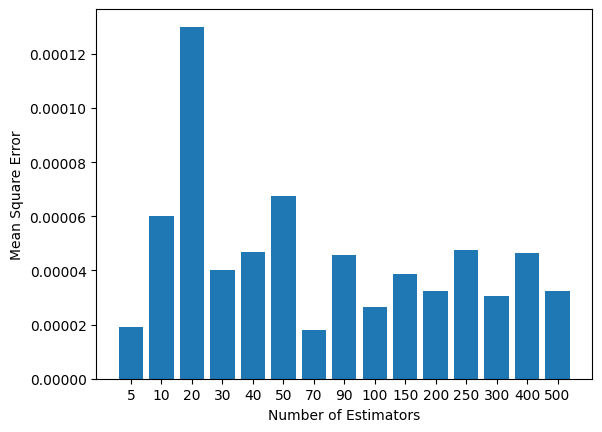

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = estimator[0:15]
y_pos = np.arange(len(objects))
performance = results[0:15]

plt.bar(y_pos, performance, align='center', alpha=1, width = 0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Estimators')


plt.show()

In [16]:
##Different Metrics https://scikit-learn.org/stable/modules/model_evaluation.html

print("Mean Squared Error:")
print(mean_squared_error(name[8].predict(x_test),y_test))
print("R2 Score")
print(r2_score(name[8].predict(x_test),y_test))
print(coeff_determination(name[8].predict(x_test),y_test))

Mean Squared Error:
2.631184361122998e-05
R2 Score
0.9999382663790218


NameError: ignored

In [17]:
#Making an prediction
#prediction = clf.predict(test)
#print(prediction)

In [18]:
#imports
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from scipy import ndimage, misc
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose, Conv1D, SeparableConv2D, DepthwiseConv2D
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import pickle
import time
from keras.callbacks import TensorBoard
import cv2
import keras.backend as K
from keras.layers import LeakyReLU
from scipy import stats 

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

#model.compile(optimizer='adam', loss='mean_squared_error', metrics=[coeff_determination])


In [19]:

nombre_h5 = 'AirSavings.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model = Sequential()

model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])


In [20]:

nombre_h5_dropout = 'AirSavings_dropout.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5_dropout, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model2 = Sequential()

model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])

In [21]:

nombre_h5_bn = 'AirSavings_bn.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5_bn, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model3 = Sequential()

model3.add(Dense(50, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(100, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(50, activation='relu'))
model3.add(Dense(1))

model3.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])

In [22]:

nombre_h5_bndo = 'AirSavings_bndo.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5_bndo, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model4 = Sequential()

model4.add(Dense(50, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(50, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1))

model4.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])

In [23]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)



Epoch 1/400

Epoch 00001: val_loss improved from inf to 166168160.00000, saving model to AirSavings_bndo.h5
76/76 - 3s - loss: 155084718080.0000 - coeff_determination: -3.0470e+11 - val_loss: 166168160.0000 - val_coeff_determination: -4.3201e+08 - 3s/epoch - 35ms/step
Epoch 2/400

Epoch 00002: val_loss improved from 166168160.00000 to 7403.16846, saving model to AirSavings_bndo.h5
76/76 - 0s - loss: 21663428.0000 - coeff_determination: -4.8651e+07 - val_loss: 7403.1685 - val_coeff_determination: -1.9252e+04 - 379ms/epoch - 5ms/step
Epoch 3/400

Epoch 00003: val_loss improved from 7403.16846 to 1029.94507, saving model to AirSavings_bndo.h5
76/76 - 0s - loss: 91321.3906 - coeff_determination: -2.9513e+05 - val_loss: 1029.9451 - val_coeff_determination: -2.6682e+03 - 406ms/epoch - 5ms/step
Epoch 4/400

Epoch 00004: val_loss improved from 1029.94507 to 820.61005, saving model to AirSavings_bndo.h5
76/76 - 0s - loss: 15135.0107 - coeff_determination: -2.8454e+04 - val_loss: 820.6100 - val_

In [24]:
history2 = model2.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)

Epoch 1/400

Epoch 00001: val_loss did not improve from 4.26102
76/76 - 1s - loss: 2531403235328.0000 - coeff_determination: -5.7135e+12 - val_loss: 10904662016.0000 - val_coeff_determination: -2.8350e+10 - 1s/epoch - 17ms/step
Epoch 2/400

Epoch 00002: val_loss did not improve from 4.26102
76/76 - 0s - loss: 142279491584.0000 - coeff_determination: -3.3214e+11 - val_loss: 788734464.0000 - val_coeff_determination: -2.0506e+09 - 325ms/epoch - 4ms/step
Epoch 3/400

Epoch 00003: val_loss did not improve from 4.26102
76/76 - 0s - loss: 17770508288.0000 - coeff_determination: -4.0289e+10 - val_loss: 122348008.0000 - val_coeff_determination: -3.1809e+08 - 326ms/epoch - 4ms/step
Epoch 4/400

Epoch 00004: val_loss did not improve from 4.26102
76/76 - 0s - loss: 2929702656.0000 - coeff_determination: -6.9017e+09 - val_loss: 34314340.0000 - val_coeff_determination: -8.9212e+07 - 395ms/epoch - 5ms/step
Epoch 5/400

Epoch 00005: val_loss did not improve from 4.26102
76/76 - 0s - loss: 392526720.00

In [25]:
history3 = model3.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)

Epoch 1/400

Epoch 00001: val_loss did not improve from 0.43019
76/76 - 2s - loss: 5.2388 - coeff_determination: -1.0747e+01 - val_loss: 12.8213 - val_coeff_determination: -3.1932e+01 - 2s/epoch - 24ms/step
Epoch 2/400

Epoch 00002: val_loss did not improve from 0.43019
76/76 - 0s - loss: 1.0763 - coeff_determination: -1.4137e+00 - val_loss: 6.8771 - val_coeff_determination: -1.6733e+01 - 447ms/epoch - 6ms/step
Epoch 3/400

Epoch 00003: val_loss did not improve from 0.43019
76/76 - 0s - loss: 0.8826 - coeff_determination: -1.0055e+00 - val_loss: 3.2087 - val_coeff_determination: -7.3216e+00 - 470ms/epoch - 6ms/step
Epoch 4/400

Epoch 00004: val_loss did not improve from 0.43019
76/76 - 1s - loss: 0.9117 - coeff_determination: -9.7477e-01 - val_loss: 4.5612 - val_coeff_determination: -1.1023e+01 - 510ms/epoch - 7ms/step
Epoch 5/400

Epoch 00005: val_loss did not improve from 0.43019
76/76 - 0s - loss: 0.6175 - coeff_determination: -2.9600e-01 - val_loss: 4.7848 - val_coeff_determination

In [26]:
history4 = model4.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)

Epoch 1/400

Epoch 00001: val_loss did not improve from 0.43019
76/76 - 2s - loss: 15.3075 - coeff_determination: -3.4006e+01 - val_loss: 6.8256 - val_coeff_determination: -1.6397e+01 - 2s/epoch - 26ms/step
Epoch 2/400

Epoch 00002: val_loss did not improve from 0.43019
76/76 - 0s - loss: 6.9192 - coeff_determination: -1.4301e+01 - val_loss: 3.6714 - val_coeff_determination: -8.3230e+00 - 444ms/epoch - 6ms/step
Epoch 3/400

Epoch 00003: val_loss did not improve from 0.43019
76/76 - 0s - loss: 5.5888 - coeff_determination: -1.1374e+01 - val_loss: 2.2110 - val_coeff_determination: -4.5874e+00 - 491ms/epoch - 6ms/step
Epoch 4/400

Epoch 00004: val_loss did not improve from 0.43019
76/76 - 0s - loss: 4.9098 - coeff_determination: -1.0214e+01 - val_loss: 1.9325 - val_coeff_determination: -3.8907e+00 - 434ms/epoch - 6ms/step
Epoch 5/400

Epoch 00005: val_loss did not improve from 0.43019
76/76 - 0s - loss: 4.1781 - coeff_determination: -8.3093e+00 - val_loss: 1.3766 - val_coeff_determination

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])


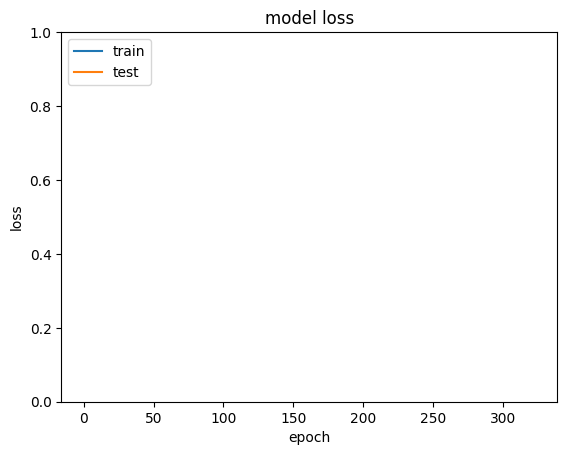

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])


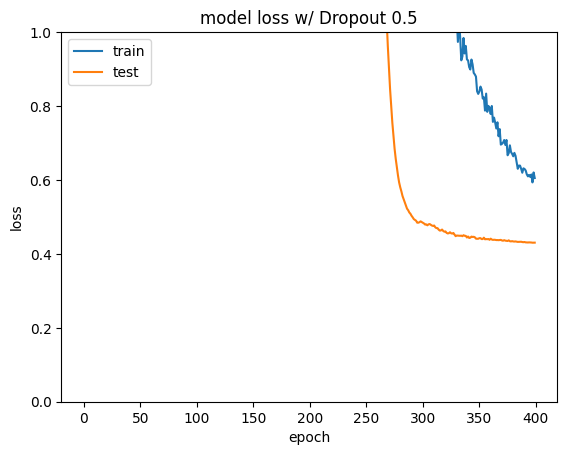

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])


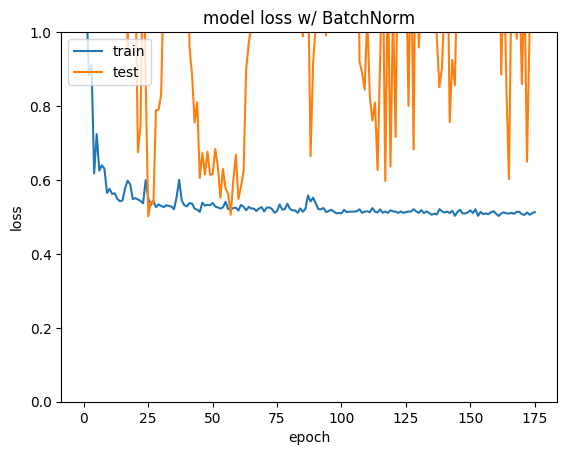

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])


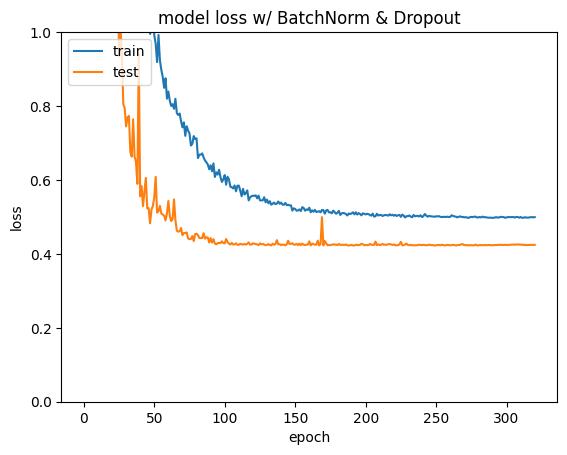

In [27]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss w/ Dropout 0.5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss w/ BatchNorm')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

print(history4.history.keys())
# summarize history for accuracy
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss w/ BatchNorm & Dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()




In [28]:
print(min(history.history['val_loss']))
print(min(history2.history['val_loss']))
print(min(history3.history['val_loss']))
print(min(history4.history['val_loss']))

4.261020660400391
0.43018838763237
0.5016051530838013
0.42278915643692017


In [29]:
print(max(history.history['val_coeff_determination']))
print(max(history2.history['val_coeff_determination']))
print(max(history3.history['val_coeff_determination']))
print(max(history4.history['val_coeff_determination']))

-9.757707595825195
-0.04990806430578232
-0.23761679232120514
-0.033153701573610306


In [30]:


print(np.where(np.asarray(history.history['val_loss']) == 0.21017539501190186))
print(np.where(np.asarray(history2.history['val_loss']) == 0.23860760033130646))
print(np.where(np.asarray(history3.history['val_loss']) == 00.22549794614315033))
print(np.where(np.asarray(history4.history['val_loss']) == 0.2181679606437683))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [ ]:
print(history.history['val_coeff_determination'][102])
print(history2.history['val_coeff_determination'][385])
print(history3.history['val_coeff_determination'][168])
print(history4.history['val_coeff_determination'][233])

In [ ]:
nombre_h5 = 'AirSavings.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model = Sequential()

model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])


In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=200,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)



In [31]:

nombre_h5_bndo = 'AirSavings_bndo.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5_bndo, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model4 = Sequential()

model4.add(Dense(1000, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(1000, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(1000, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(1000, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(1))

model4.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])
history4 = model4.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)

Epoch 1/400

Epoch 00001: val_loss improved from inf to 6.74007, saving model to AirSavings_bndo.h5
76/76 - 3s - loss: 17.4721 - coeff_determination: -3.8275e+01 - val_loss: 6.7401 - val_coeff_determination: -1.6319e+01 - 3s/epoch - 42ms/step
Epoch 2/400

Epoch 00002: val_loss improved from 6.74007 to 3.53530, saving model to AirSavings_bndo.h5
76/76 - 1s - loss: 5.3053 - coeff_determination: -1.0871e+01 - val_loss: 3.5353 - val_coeff_determination: -8.1232e+00 - 956ms/epoch - 13ms/step
Epoch 3/400

Epoch 00003: val_loss improved from 3.53530 to 0.65165, saving model to AirSavings_bndo.h5
76/76 - 1s - loss: 3.7645 - coeff_determination: -7.4023e+00 - val_loss: 0.6516 - val_coeff_determination: -6.2091e-01 - 1s/epoch - 14ms/step
Epoch 4/400

Epoch 00004: val_loss improved from 0.65165 to 0.52117, saving model to AirSavings_bndo.h5
76/76 - 1s - loss: 2.8694 - coeff_determination: -5.3327e+00 - val_loss: 0.5212 - val_coeff_determination: -2.7661e-01 - 1s/epoch - 14ms/step
Epoch 5/400

Epo